# 1. Data preparation

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas_datareader.data import DataReader
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

In [3]:
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

In [8]:
# get data and build dataframe for each stock
stock_names = ["AAPL", "GOOG", "MSFT", "AMZN"]

for stock in stock_names:
    globals()[stock] = DataReader(stock, "yahoo", start_date, end_date)
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'np', 'pd', 'plt', 'sm', 'plot_acf', 'plot_pacf', '_i2', 'DataReader', 'warnings', 'datetime', '_i3', 'end_date', 'start_date', '_i4', '_4', '_i5', '_5', '_i6', '_6', '_i7', '_i8', 'stock_names', 'stock', 'AAPL', 'GOOG', 'MSFT', 'AMZN'])

In [13]:
stock_dfs = [AAPL, GOOG, MSFT, AMZN]
company_names = ["Apple", "Google", "Microsoft", "Amazon"]

# add a new column of company name for each dataset 
for stock_df, company_name in zip(stock_dfs, company_names):
    stock_df["Company"] = company_name

data = pd.concat(stock_dfs, axis = 0)
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400.0,3151.939941,Amazon
2021-05-13,3203.840088,3133.000000,3185.469971,3161.469971,3350900.0,3161.469971,Amazon
2021-05-14,3228.860107,3183.000000,3185.560059,3222.899902,3321400.0,3222.899902,Amazon
2021-05-17,3292.750000,3234.590088,3245.929932,3270.389893,3717900.0,3270.389893,Amazon
2021-05-18,3312.000000,3230.370117,3292.574951,3232.280029,2828391.0,3232.280029,Amazon


In [14]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1012.000000,1012.000000,1012.000000,1012.000000,1.012000e+03,1012.000000
mean,1320.447807,1288.775797,1304.975098,1304.508423,4.119523e+07,1304.209293
std,1264.611049,1233.400574,1250.084282,1248.592660,5.786783e+07,1248.863887
min,79.125000,77.580002,78.292503,78.285004,3.468000e+05,77.761040
25%,172.765003,167.792503,171.049999,171.839996,2.600525e+06,170.732456
50%,827.595001,803.590012,809.920029,810.935013,9.721600e+06,810.935013
75%,2433.880005,2385.875000,2404.614990,2410.187561,6.334592e+07,2410.187561
max,3554.000000,3486.689941,3547.000000,3531.449951,3.743368e+08,3531.449951


# 2. Explorartory Data Analysis
### 2.1 Overview of all 4 companies

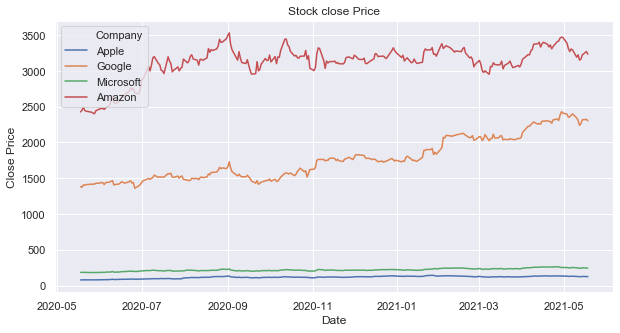

In [16]:
# visualization for all companies
sns.set(style = "darkgrid")

fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.lineplot(
    x = data.index, y = "Close", 
    data = data, hue = "Company",
    palette = "deep"
)

ax.set(
    title = "Stock close Price",
    xlabel = "Date",
    ylabel = "Close Price"
)

plt.legend()
plt.show()

### 2.2 Adjusted close price each stock

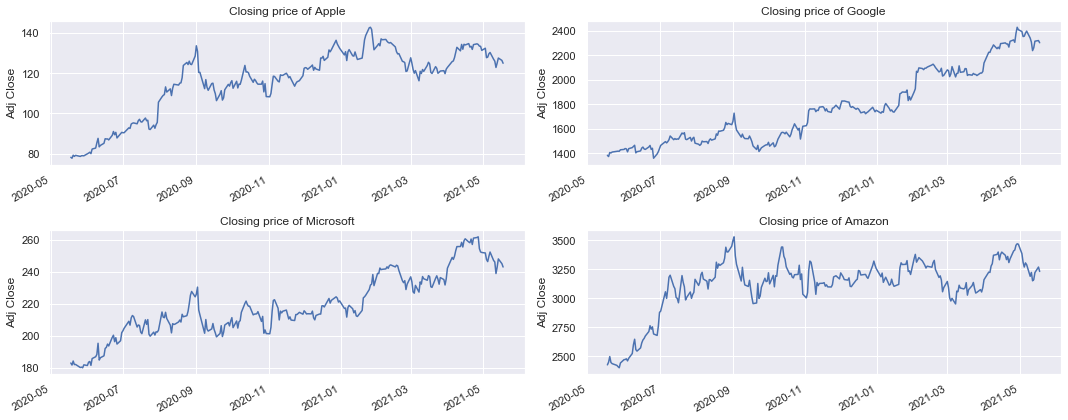

In [28]:
plt.figure(figsize = (15, 6))
plt.subplots_adjust(top = 1.25, bottom = 1.2)


for i, stock in enumerate(stock_dfs, 1): # 1 means start from index 1
    plt.subplot(2, 2, i)
    stock["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title("Closing price of {}".format(company_names[i-1]))
    
plt.tight_layout()

### 2.3 Total volume of stock traded each day

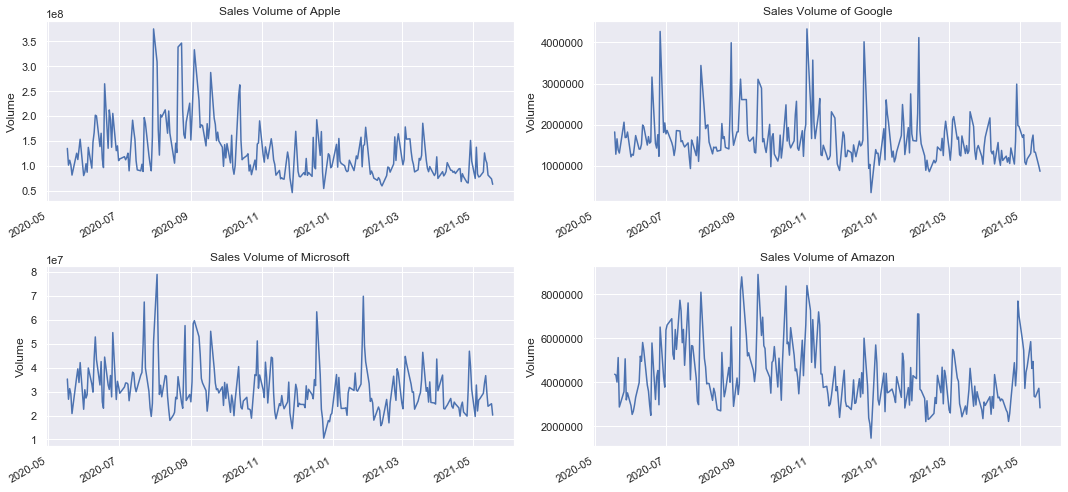

In [32]:
plt.figure(figsize = (15, 7))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, stock in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    stock["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title("Sales Volume of {}".format(company_names[i-1]))

plt.tight_layout()

### 2.4 Moving Average of each stock

In [35]:
ma_days = [10, 20, 50]

for ma in ma_days:
    for stock in stock_dfs:
        new_col = "MA for {} days".format(ma)
        stock[new_col] = stock["Adj Close"].rolling(ma).mean()

Text(0.5, 0.98, 'Moving average of each stock')

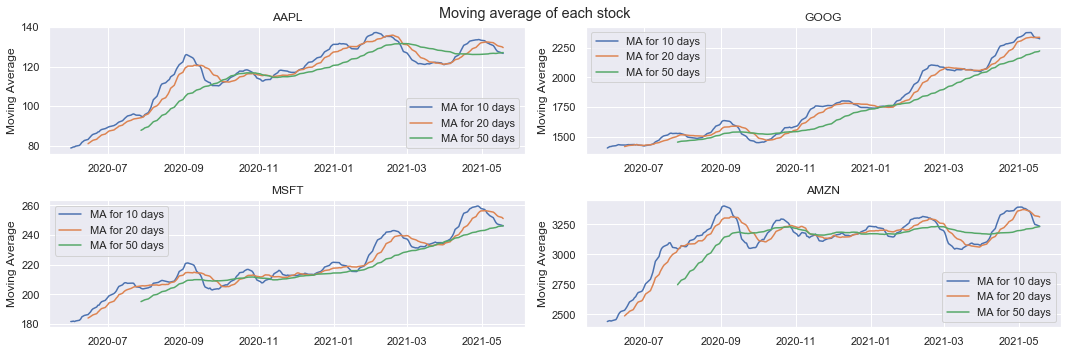

In [46]:
fig, axes = plt.subplots(2, 2, figsize = (15, 5))
axes = axes.flatten()

mas = ["MA for 10 days", "MA for 20 days", "MA for 50 days"]

for i, stock in enumerate(stock_dfs):
    for ma in mas:
        ax = sns.lineplot(x = stock.index,
                          y = stock[ma],
                          data = stock,
                          ax = axes[i],
                          label = ma
                         )
        
        ax.set(title = stock_names[i],
               xlabel = None,
               ylabel = "Moving Average"
              )

plt.legend()
plt.tight_layout()
plt.suptitle("Moving average of each stock")

### 2.5 Daily Return

In [47]:
# use pct_change to find the percent change for each day
for stock in stock_dfs:
    stock['Daily Return'] = stock['Adj Close'].pct_change()

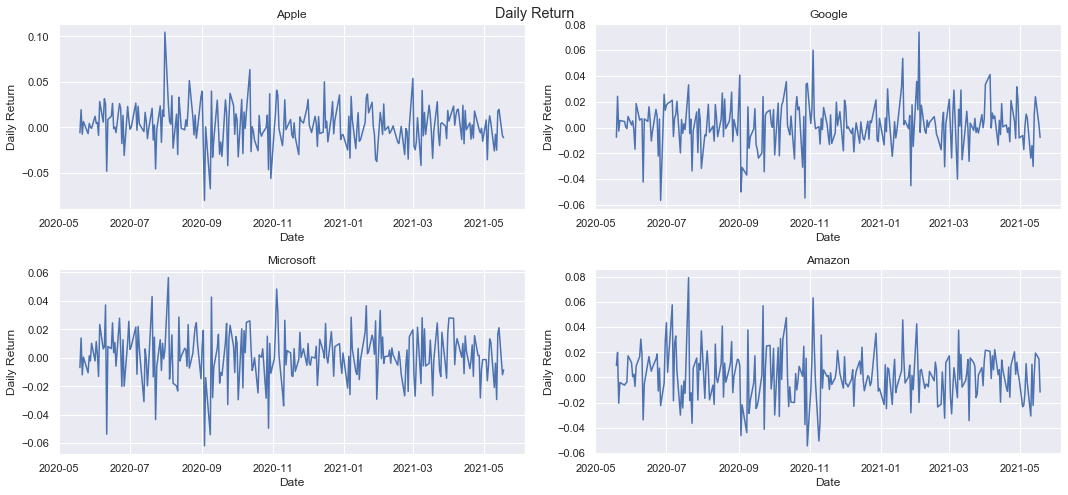

In [63]:
#line Chart
fig, axes = plt.subplots(2, 2, figsize = (15, 7))
axes = axes.flatten()

for i, stock in enumerate(stock_dfs):
    ax = sns.lineplot(
        x = stock.index,
        y = "Daily Return",
        data = stock,
        ax = axes[i]
    )
    ax.set(
        title = company_names[i]
    )
    
plt.suptitle("Daily Return")
plt.tight_layout()

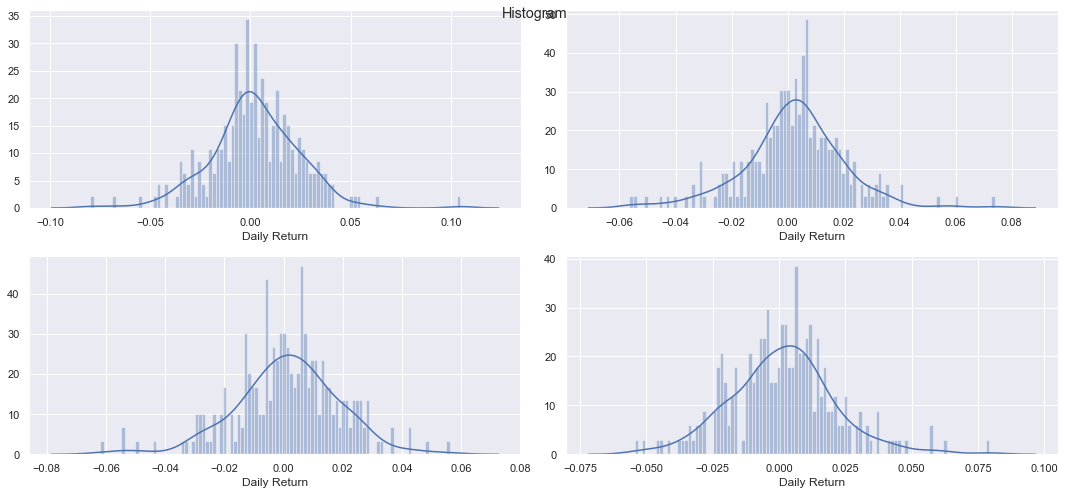

In [62]:
#histogram
sns.set(style = "darkgrid")
fig, axes = plt.subplots(2, 2, figsize = (15, 7))
axes = axes.flatten()

for i, stock in enumerate(stock_dfs):
    ax = sns.distplot(
        stock["Daily Return"].dropna(),
        bins = 100,
        ax = axes[i]
    )
    
plt.suptitle("Histogram")
plt.tight_layout()

### 2.6 The correlation between different stocks closing prices

In [65]:
# First, grab all the closing prices for each stock
closing_df = DataReader(
    stock_names, 'yahoo',
    start_date, end_date
)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,78.212997,1383.939941,182.628143,2426.260010
2020-05-19,77.761040,1373.484985,181.363937,2449.330078
2020-05-20,79.273354,1406.719971,183.879578,2497.939941
2020-05-21,78.682327,1402.800049,181.670944,2446.739990
2020-05-22,79.188927,1410.420044,181.750183,2436.879883


In [66]:
pct_closing = closing_df.pct_change()
pct_closing

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,NaN,NaN,NaN,NaN
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007456,-0.002787,-0.012011,-0.020497
2020-05-22,0.006439,0.005432,0.000436,-0.004030
...,...,...,...,...
2021-05-12,-0.024939,-0.030181,-0.029363,-0.022324
2021-05-13,0.017920,0.010223,0.016862,0.003024
2021-05-14,0.019845,0.023957,0.021067,0.019431


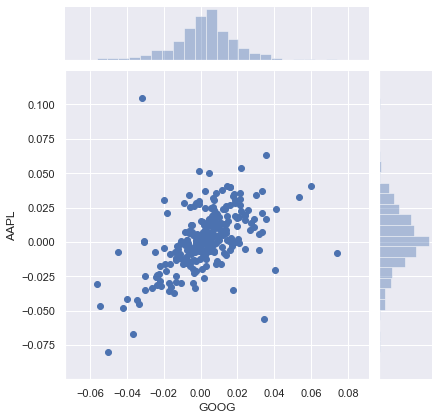

In [68]:
sns.jointplot("GOOG", "AAPL", pct_closing)

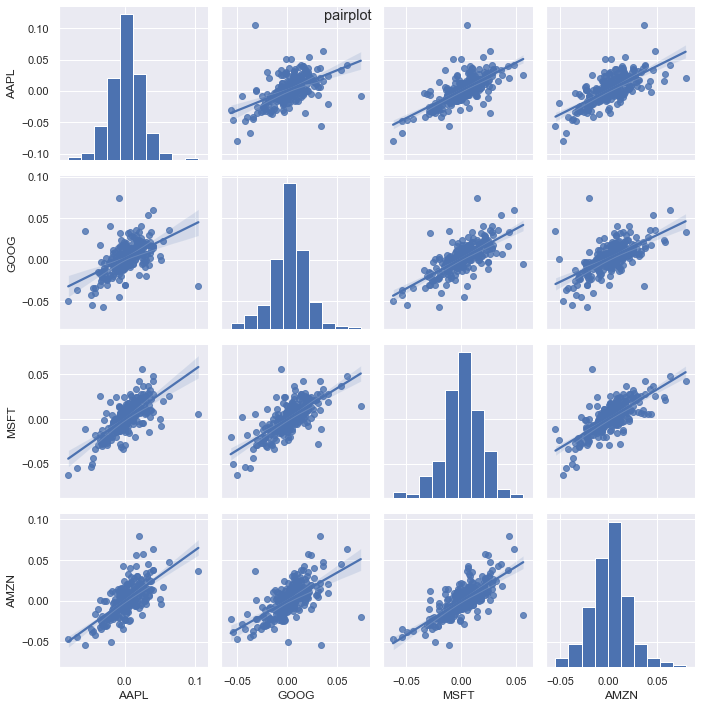

In [76]:
sns.pairplot(pct_closing, kind = "reg")
plt.suptitle("pairplot")
plt.tight_layout()

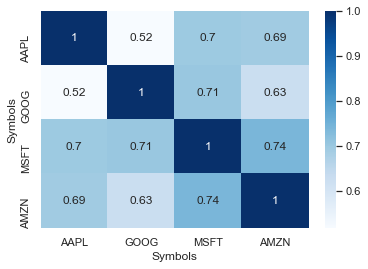

In [80]:
sns.heatmap(pct_closing.corr(), annot=  True, cmap = "Blues")

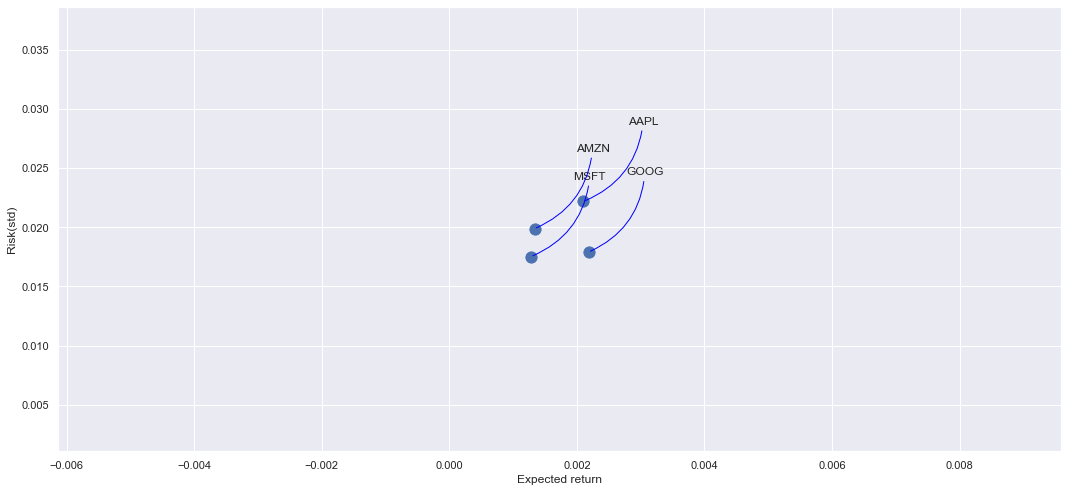

In [94]:
pct_closing = pct_closing.dropna()
area = np.pi * 40

plt.figure(figsize = (15, 7))
plt.scatter(pct_closing.mean(), pct_closing.std(), s = area)
plt.xlabel("Expected return")
plt.ylabel("Risk(std)")

for label, x, y in zip(
    pct_closing.columns,
    pct_closing.mean(),
    pct_closing.std()
):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (75, 75),
        textcoords = "offset points",
        ha = "right",
        va = "bottom",
        arrowprops = dict(
            arrowstyle = '-',
            color = 'blue',
            connectionstyle = 'arc3,rad = -0.3'
        )
    )

plt.tight_layout()

### 3.Predicting stock price

Here we use APPL as example

In [96]:
df = DataReader(
    'AAPL', 
    data_source='yahoo', 
    start = '2012-01-01', 
    end = datetime.now()
)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-14,127.889999,125.849998,126.250000,127.449997,81806500.0,127.449997
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,126.269997
2021-05-18,126.989998,124.779999,126.559998,124.849998,63342900.0,124.849998


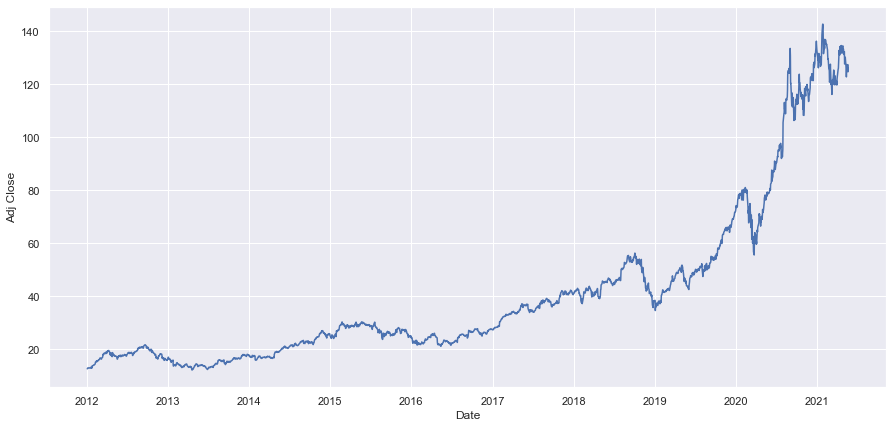

In [99]:
plt.figure(figsize=(15, 7))
sns.lineplot(df.index, df["Adj Close"])

In [138]:
data = df.filter(["Close"])
dataset = data.values

training_data_len = int(
    np.ceil(len(dataset)* 0.95)
)
training_data_len

2243

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.85829541],
       [0.85705717],
       [0.87733381]])

In [141]:
train_data = scaled_data[0: int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
"""    if i <= 61:
        print(x_train)
        print(y_train)
        print()"""

print(x_train[0])
print(y_train[0])

[0.00572147 0.00633231 0.00760099 0.00880885 0.00862367 0.00904103
 0.00885031 0.00852969 0.00809297 0.00944457 0.0106635  0.01028759
 0.00822841 0.01019361 0.00825882 0.01551431 0.01495322 0.01568568
 0.01726944 0.01822855 0.01814839 0.01785265 0.01911303 0.02029878
 0.02164209 0.02381183 0.02836966 0.02843875 0.03097611 0.0328722
 0.02961346 0.03086831 0.03084343 0.034362   0.03386171 0.03478765
 0.03645157 0.03737752 0.04004478 0.04198786 0.04254895 0.0427452
 0.03942288 0.03862131 0.03874017 0.04186349 0.04274244 0.04463025
 0.04908028 0.05501734 0.05390621 0.05390897 0.05820147 0.05954478
 0.05858842 0.05771501 0.05680565 0.05982669 0.0618997  0.06276759]
0.06062272301844436


In [142]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2183, 60, 1)

In [143]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(
    LSTM(128, return_sequences = True, 
        input_shape = (x_train.shape[1], 1)
        )
)
model.add(
    LSTM(64, return_sequences = False)
)

model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2183/2183 [==============================] - 41s 19ms/step - loss: 0.0012 0s - loss: 0


In [148]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [150]:
print(x_test[0])
print(y_test[0])

[0.82818997 0.76519297 0.80001932 0.77037821 0.75884684 0.78485052
 0.78624358 0.75985291 0.74599976 0.71891259 0.74398761 0.75737637
 0.72107962 0.72959271 0.7610138  0.78175483 0.77502172 0.78833313
 0.79591756 0.76674079 0.79367319 0.76782433 0.78268356 0.78183224
 0.79731062 0.8548128  0.82927345 0.82997001 0.82625517 0.81317592
 0.78964884 0.80148979 0.79653671 0.7878688  0.78237398 0.78245139
 0.7944471  0.75265546 0.78454094 0.73454579 0.73384923 0.74677372
 0.78167742 0.81325333 0.81062203 0.79228013 0.78957143 0.81681335
 0.81464639 0.81503337 0.82308213 0.81603944 0.80551414 0.81023505
 0.80017408 0.77316433 0.78338005 0.79003576 0.79436969 0.81340815]
[122.72000122]


In [151]:
x_test = np.array(x_test)
x_test = np.reshape(
    x_test,
    (x_test.shape[0], x_test.shape[1],1)
)

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean((pred - y_test)**2))

In [152]:
rmse

9.650420067241704

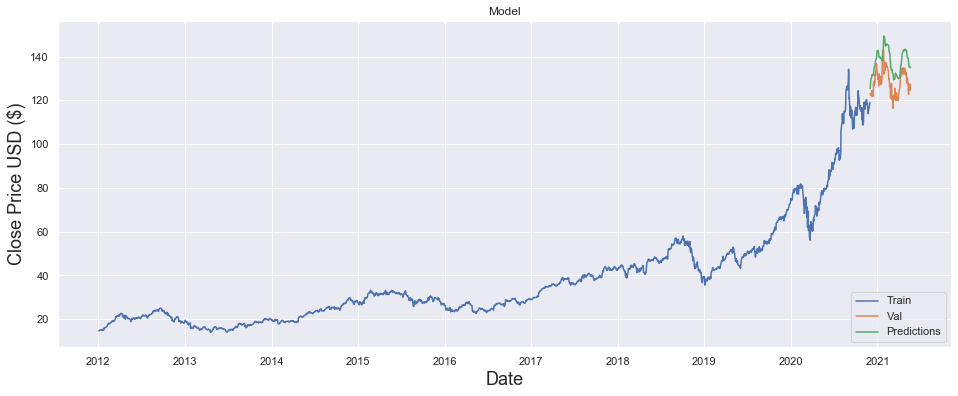

In [154]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

As we can see, we are able to predict the trend of recent stock price very well.